# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

In this Senario, you will estimate the prices of cars using regression algorithms.

EDA Processing and Features Importance methods were applied before moving to modelling. ***Lasso Regression, AdaBoost, GradientBoost and XG Boost*** models used for this notebook to develop the project.

In [5]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [6]:
df = pd.read_csv("df_with_feature_imp.csv")

In [3]:
df.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package,price
0,Audi A1,66.0,56013.0,3.0,Automatic,7.0,Used,Safety Premium Package,15770
1,Audi A1,141.0,80000.0,2.0,Automatic,7.0,Used,Safety Premium Package,14500
2,Audi A1,85.0,83450.0,3.0,Automatic,7.0,Used,Safety Premium Package,14640
3,Audi A1,66.0,73000.0,3.0,Automatic,6.0,Used,Safety Premium Package,14500
4,Audi A1,66.0,16200.0,3.0,Automatic,7.0,Used,Safety Premium Package,16790


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               15493 non-null  object 
 1   hp_kW                    15493 non-null  float64
 2   km                       15493 non-null  float64
 3   age                      15493 non-null  float64
 4   Gearing_Type             15493 non-null  object 
 5   Gears                    15493 non-null  float64
 6   Type                     15493 non-null  object 
 7   Safety_Security_Package  15493 non-null  object 
 8   price                    15493 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [143]:
df.describe()

,hp_kW,km,age,Gears,price
count,15493.000,15493.000,15493.000,15493.000,15493.000
mean,87.038,32814.310,1.418,5.928,17578.474
std,24.570,37178.668,1.119,0.705,6764.038
min,40.000,0.000,0.000,5.000,4950.000
25%,66.000,3000.000,0.000,5.000,12600.000
50%,85.000,21215.000,1.000,6.000,16690.000
75%,100.000,48000.000,2.000,6.000,21500.000
max,239.000,317000.000,3.000,8.000,50950.000


# Data Preprocessing

In [144]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# train and test metrics for comparing in the end of modelling
pd.options.display.float_format = '{:.3f}'.format

### Lasso Regression

In [145]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

In [146]:
X = df.drop(columns = ["price"])
y = df.price

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [148]:
X_train.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
5818,Opel Astra,100.000,66535.000,2.000,Automatic,6.000,Used,Safety Premium Package
12640,Opel Insignia,121.000,8650.000,0.000,Manual,6.000,Used,Safety Premium Package
4447,Audi A3,85.000,3000.000,1.000,Automatic,7.000,Used,Safety Premium Package
6061,Opel Astra,103.000,89738.000,3.000,Manual,6.000,Used,Safety Premium Package
9991,Opel Corsa,51.000,50.000,0.000,Manual,5.000,Pre-registered,Safety Premium Package


In [149]:
cat_onehot = ['make_model', 'Type', 'Gearing_Type']
cat_ordinal = ['Safety_Security_Package']

Safety_Security_Package = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']
    
categories = [Safety_Security_Package]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       (OrdinalEncoder(categories=categories), cat_ordinal),
                                       remainder='passthrough')

In [150]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.882,0.879
mae,1656.817,1619.918
mse,5470129.665,5304445.257
rmse,2338.831,2303.138


#### Cross Validate

In [151]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("scaler", MinMaxScaler()), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

In [152]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.881
train_r2                                   0.882
test_neg_mean_absolute_error           -1659.164
train_neg_mean_absolute_error          -1656.716
test_neg_mean_squared_error         -5489269.264
train_neg_mean_squared_error        -5469107.920
test_neg_root_mean_squared_error       -2341.656
train_neg_root_mean_squared_error      -2338.596
dtype: float64

In [153]:
scores["test_neg_root_mean_squared_error"].mean()/df.price.mean()  # error ratio

-0.13321157986298915

In [154]:
y_pred = lasso_model.predict(X_test)
lasso_R2 = r2_score(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### AdaBoost

In [155]:
from sklearn.ensemble import AdaBoostRegressor

In [156]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("Ada_model", AdaBoostRegressor(loss='square',
                                                                                n_estimators=150, random_state=101))]

pipe_ada_model = Pipeline(steps=operations)

pipe_ada_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'Type',
                                                   'Gearing_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Safety_Security_Package'])])),
                ('Ada_model',
                 AdaBoostRegressor(loss='square', n_estimators=150,
                                   random_state=101))])

In [157]:
train_val(pipe_ada_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.829,0.825
mae,2335.920,2281.533
mse,7928765.320,7650950.877
rmse,2815.806,2766.035


#### Cross Validate

In [158]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10, 
                        return_train_score=True)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

# there is no overfitting

test_r2                                    0.810
train_r2                                   0.811
test_neg_mean_absolute_error           -2446.782
train_neg_mean_absolute_error          -2437.979
test_neg_mean_squared_error         -8796543.651
train_neg_mean_squared_error        -8733017.020
test_neg_root_mean_squared_error       -2964.988
train_neg_root_mean_squared_error      -2954.786
dtype: float64

In [159]:
scores["test_neg_root_mean_squared_error"].mean()/df.price.mean()  # error ratio

-0.16867150941399697

In [160]:
y_pred = pipe_ada_model.predict(X_test)
ada_R2 = r2_score(y_test, y_pred)
ada_mae = mean_absolute_error(y_test, y_pred)
ada_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### GradientBoost

In [161]:
from sklearn.ensemble import GradientBoostingRegressor

In [162]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

pipe_grad_model = Pipeline(steps=operations)

pipe_grad_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'Type',
                                                   'Gearing_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Safety_Security_Package'])])),
                ('GB_model', GradientBoostingRegressor(random_state=101))])

In [163]:
train_val(pipe_grad_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.935,0.932
mae,1206.601,1206.170
mse,2998011.871,2960827.117
rmse,1731.477,1720.705


#### Cross Validate

In [164]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
                       return_train_score=True)

pd.DataFrame(scores).mean()[2:]

# there is no overfitting

test_r2                                    0.932
train_r2                                   0.936
test_neg_mean_absolute_error           -1225.916
train_neg_mean_absolute_error          -1198.031
test_neg_mean_squared_error         -3140205.485
train_neg_mean_squared_error        -2973024.789
test_neg_root_mean_squared_error       -1770.664
train_neg_root_mean_squared_error      -1724.220
dtype: float64

In [165]:
scores["test_neg_root_mean_squared_error"].mean()/df.price.mean()  # error ratio

-0.10072912135229574

In [166]:
y_pred = pipe_grad_model.predict(X_test)
grad_R2 = r2_score(y_test, y_pred)
grad_mae = mean_absolute_error(y_test, y_pred)
grad_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### XGBoost

In [167]:
import xgboost as xgb
from xgboost import XGBRegressor

In [168]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("XGB_model", XGBRegressor(random_state=101))]

pipe_xgb_model = Pipeline(steps=operations)

pipe_xgb_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'Type',
                                                   'Gearing_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Safety...
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=101, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [169]:
train_val(pipe_xgb_model, X_train, y_train, X_test, y_test)  # there might be overfitting !

,train,test
R2,0.970,0.951
mae,807.304,988.070
mse,1391201.828,2127290.503
rmse,1179.492,1458.523


#### GridSearch and Cross Validate

In [170]:
param_grid = {"XGB_model__n_estimators":[70,80],
              "XGB_model__max_depth":[4,5], 
              "XGB_model__learning_rate": [0.2,0.25],
              "XGB_model__subsample": [0.8, 1], 
              "XGB_model__colsample_bytree":[0.8, 1],
              "XGB_model__colsample_bylevel":[0.8, 1],
             
              }

In [171]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [172]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'Type',
                                                                          'Gearing_Type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Safety '
                                                                                                     'Standard '
                                                                                                     'Package',
                                                                                                     'Safety '
                                                                                                     'Premium '
                                                                                                     'Package',
                                                                                                     'Safety '
                                                                                                     'Premiu...
                                                     tree_method=None,
                                                     validate_parameters=None,
                                                     verbosity=None))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bylevel': [0.8, 1],
                         'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.2, 0.25],
                         'XGB_model__max_depth': [4, 5],
                         'XGB_model__n_estimators': [70, 80],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [173]:
grid_model.best_params_

{'XGB_model__colsample_bylevel': 1,
 'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.25,
 'XGB_model__max_depth': 5,
 'XGB_model__n_estimators': 80,
 'XGB_model__subsample': 0.8}

In [174]:
index = grid_model.best_index_
index

46

In [175]:
pd.DataFrame(grid_model.cv_results_).loc[index, ["mean_test_score", "mean_train_score"]]

mean_test_score    -1560.060
mean_train_score   -1353.289
Name: 46, dtype: object

In [181]:
pd.DataFrame(grid_model.cv_results_).loc[index, "mean_test_score"]/df.price.mean()

-0.08874829786524545

In [176]:
prediction = grid_model.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, prediction))

train_val(grid_model, X_train, y_train, X_test, y_test)

# there is no overfitting and error ratio is better.

,train,test
R2,0.959,0.950
mae,956.899,1028.052
mse,1907808.982,2204250.325
rmse,1381.235,1484.672


In [182]:
y_pred = grid_model.predict(X_test)
xgb_R2 = r2_score(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Compare Scores

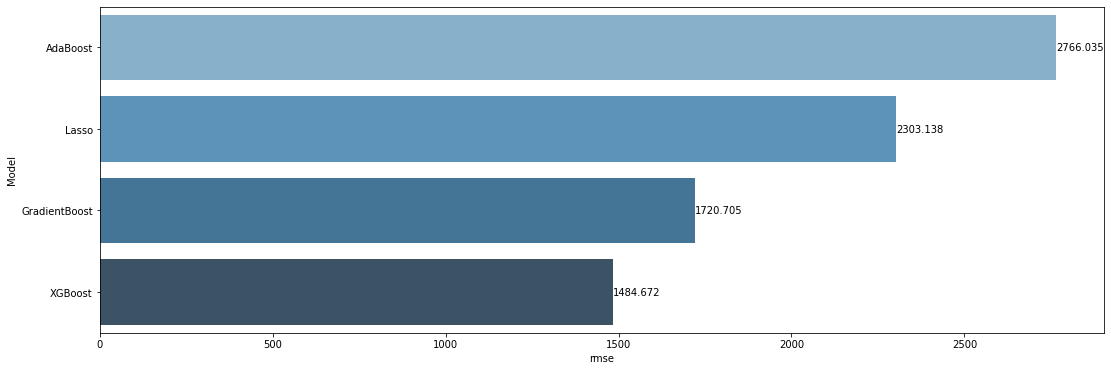

In [186]:
compare = pd.DataFrame({"Model": ["Lasso","AdaBoost","GradientBoost", "XGBoost"],
                        "rmse": [lasso_rmse, ada_rmse, grad_rmse, xgb_rmse]})
   
plt.figure(figsize=(18,6))

compare = compare.sort_values(by="rmse", ascending=False)
ax=sns.barplot(x="rmse", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

In [187]:
# XGBoost will be selected with least error from the into models for final model

## Final Model

In [189]:
X = df.drop(columns = ["price"])
y = df.price

In [190]:
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,Used,Safety Premium Package
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,Used,Safety Premium Package
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,Used,Safety Premium Package
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,Used,Safety Premium Package
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,Used,Safety Premium Package


In [191]:
operations = [("OneHot_Ordinal_Encoder", column_trans), ("XGB_model", XGBRegressor(random_state=101,colsample_bylevel=1,
                                                                                  colsample_bytree=0.8,learning_rate=0.25,
                                                                                  max_depth=5,n_estimators=80,subsample=0.8))]
final_model = Pipeline(steps=operations)

In [192]:
final_model.fit(X,y)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'Type',
                                                   'Gearing_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['Safety...
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.25,
                              max_delta_step=0, max_depth=5, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=80, n_jobs=8, num_parallel_tree=1,
                              predictor='auto', random_state=101, reg_alpha=0,
                              reg_lambda=1, scale_pos_weight=1, subsample=0.8,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

## Prediction with Final Model

In [198]:
pred_dict = {
    "make_model": 'Audi A3',
    "hp_kW": 66,
    "km": 28000,
    "age": 3,
    "Gearing_Type": "Automatic",
    "Gears": 7,
    "Type":"Used",
    'Safety_Security_Package':'Safety Premium Package'
}

In [199]:
pred_dict_df = pd.DataFrame([pred_dict])
pred_dict_df

,make_model,hp_kW,km,age,Gearing_Type,Gears,Type,Safety_Security_Package
0,Audi A3,66,28000,3,Automatic,7,Used,Safety Premium Package


In [200]:
final_model.predict(pred_dict_df)

array([16124.552], dtype=float32)

## Pickle for Model Deployment

In [202]:
import pickle

In [203]:
pickle.dump(final_model, open("final_model", 'wb'))